In [1]:
# IMPORT VARIABLES, LIBRARIES AND FUNCTIONS
%matplotlib inline
from eda_funk import * # Stored functions and variables regarding EDA analysis
from analysis_funk import * # Stored functions and variables to plot the map of Paris
data = mybar_data
print(data.columns.shape)
data.head(2).T

/Users/iZbra1/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


(39,)


listing_id,17994,10607664
zipcode,75001,75001
host_id,69389,81740
host_since,2010-01-10 00:00:00,2010-02-16 00:00:00
host_response_time,within a few hours,within a day
host_neighbourhood,Châtelet - Les Halles - Beaubourg,Pigalle - Saint-Georges
host_verifications,"['email', 'phone', 'reviews']","['email', 'phone', 'reviews', 'jumio', 'govern..."
host_is_superhost,True,False
latitude,48.8609,48.8577
longitude,2.34254,2.3451
property_type,Apartment,Apartment


# Questions

## I. Where are the best listings? Which are Paris best/worst neighbourhoods to stay at?
- Define best and worst listings in terms of: 
    - *host qualities:* review_scores_communication, review_scores_checkin, host_is_superhost, host_response_time, host_verifications, review_scores_access
    - *occupancy_rate:* reviews_per_month, number_of_reviews
    - *property:* review_scores_cleanliness, amenities, price
        - Segment listings by what amenities they provide. Use clustering methods to do so. 
- Define best neighbourhoods
    - review_score_location
    - Proximity to tourist attractions, parks and recreations
    - Safe
    - Transport? 

### *If the best neighbourhoods cannot be defined then find if guests are choosing 'nimportequoi' listings, or what is the second best thing they choose?*
    
---

### HOST
**1. What is a superhost? (answer in website)**
    - Good Host keys: host_is_superhost, host_response_time, host_verifications
    - A superhost has the following requirements: 
        - Achieve a 4.8+ overall rating, 
        - Respond within 24 hours at least 90% of the time, 
        - Host at least 10 stays a year and 
        - 0 Cancellations
    - A superhost enjoys an increased visibility compared to other hosts, along with other perks. 
    
### NEIGHBOURHOOD

**4. Is the price correlated with the neighbourhood?**

**5. Is the cancellation policy a cause or an effect of guests cancelling at the last minute?**
    - Are there particular neighborhoods that have a tight cancellation policy? 

### PROPERTY

**6. Can we define the size of the listings by the number of beds and bathrooms?**

**7. There is room to implement assoc rules in variables like amenities and host_verifications.**

**8. Im curious what do listings that have 0 beds and 0 amenities, have to offer... do they have a non-null value for the accomodates and guest_included values?**

**9. What are rare amenities and which ones are the most common? are most rare amenities considered luxurious? which of them can be considered as such? Which categories can be considered luxurious? **


---

## What are the factors that we can use to consider if the listing is good or not?

## Maybe we can make value counts for variables such as cancel policy and classify them by zipcode. 
For example for every zipcode, count the types of cancelation policy, beds & bathrooms etc, to see which is the majority per zipcode and see if there is a pattern. 

___
# EDA

#### host_since: 
Shows that the datasets holds hosts that have been in the Airbnb business since September 2008. 

The variable h_since_year is a series holding the number of hosts that joined Airbnb per year. It reached its peak in 2014 attaining 8512 new hosts then 8231 the next year and then a decrease of about the 60% in 2016. 


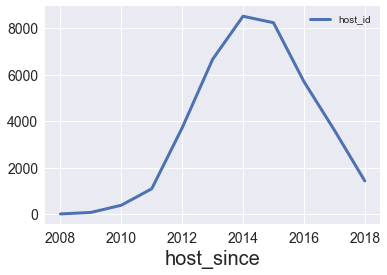

In [2]:
# Summary showing number of unique dates, first and last one. 
host_since_desc = data.host_since.describe()

# Showing the number of hosts joined per year. 
h_since_year = data.loc[:,['host_id','host_since']].set_index('host_since').resample('Y').count()
h_since_year.plot() 
plt.show()

#### host_response_time:
It's a categorical variable holding 4 unique values: 'within an hour', 'within a day', 'within a few hours','a few days or more' AND 11067 null values. Most of the listings have hosts that respond within the hour (50% approx), then 21% within a few hours, 24% within a day and less than 3% for a few days or more. 

In [25]:
hr_time = data.loc[data.host_response_time.notnull(),['host_id','host_response_time']]
hr_time_labels = hr_time.host_response_time.unique()
hr_time_hist = hr_time.host_response_time.value_counts()
hr_time_pies = hr_time_hist.values

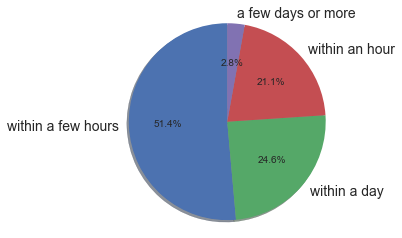

In [26]:
fig1, ax1 = plt.subplots()
ax1.pie(hr_time_pies, labels=hr_time_labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### host_neighbourhood
Has 194 unique names of the neighbourhoods in Paris and 713 null values which can be filled with their corresponding neighbourhood. However these neighbourhoods might show the place where the host lives and not necessarily the place where the listings is. 

In [5]:
h_neigh_desc = data.host_neighbourhood.describe()

#### host_listings_count
Represents the total number of listings each host has. These listings can be in Paris as well as they can be elsewhere. This dataset comprises **32387 hosts (94%)** each having 1 listing, remaining **2000** hosts with more than 1 listing and **1 host** with 114 listings!

In [6]:
unique_hosts = data.groupby('host_id').count().shape[0]
hl_count_hist = data.loc[:, ['host_listings_count','host_id']].groupby('host_id').median().sort_values('host_listings_count', ascending=False)
print(unique_hosts,'\n')
print(hl_count_hist.describe())

34383 

       host_listings_count
count         34383.000000
mean              1.144752
std               1.520597
min               1.000000
25%               1.000000
50%               1.000000
75%               1.000000
max             114.000000


***host_verifications***

Contains 331 unique combinations using 21 verification sources such as email, phone, reviews, jumio, government_id, etc.. 

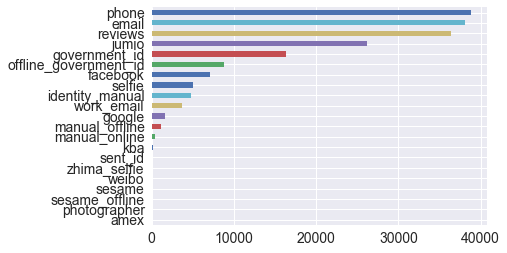

In [7]:
h_ver = []
ver_sources = {}
h_num_ver = [] # list holding the number of verifications per host. 

# Get the set of verification sources
for sl in data.host_verifications.unique():
    sublist = sl.replace('[','').replace(']','').replace("'",'').replace(',','').split()
    for item in sublist: 
        if item not in h_ver:
            h_ver.append(item)

# Initialize Host_verification_sources Dictionary
ver_sources = {h_ver[v_source]: 0 for v_source in range (0,len(h_ver))}

# Fill Dictionary
for sl in data.host_verifications:
    sublist = sl.replace('[','').replace(']','').replace("'",'').replace(',','').split()
    number_of_verifications = 0
    for item in sublist: 
        ver_sources[item]+=1
        number_of_verifications += 1
    h_num_ver.append(number_of_verifications)
        
# Convert dico to Series: 
h_verifications = pd.Series(ver_sources, name='Count')
# Graph it
h_verifications.sort_values().plot(kind='barh')
plt.show()

What is the average number of verifications hosts have? 

4.79768800813


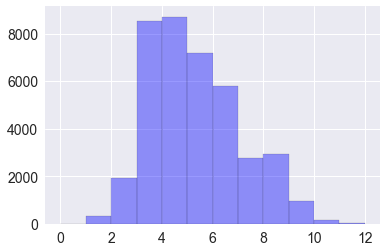

In [8]:
print(np.array(h_num_ver).mean())
sns.distplot(h_num_ver, hist=True, kde=False, 
             bins=max(h_num_ver)-min(h_num_ver), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.show()

***host_is_superhost***

In [13]:
his_pie_values = data.host_is_superhost.value_counts()

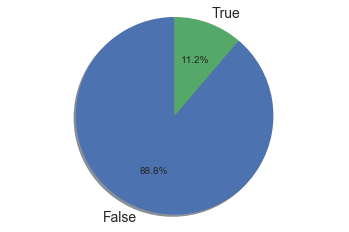

In [10]:
fig, ax = plt.subplots()
ax.pie(his_pie_values.values, labels=his_pie_values.index.values, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

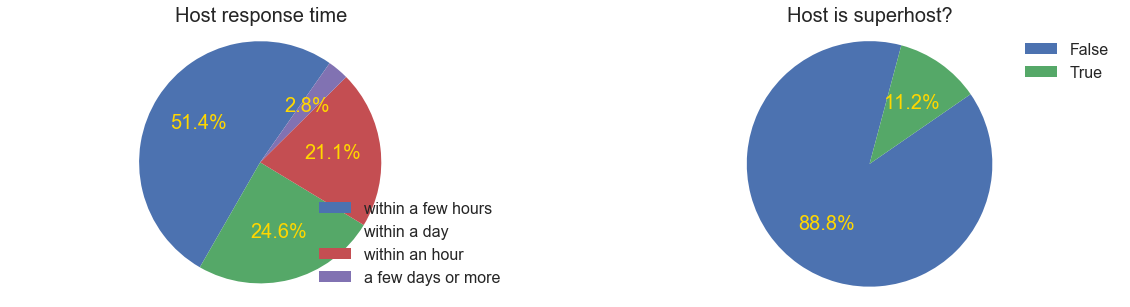

In [16]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,2,1)
ax1.pie(hr_time_pies, autopct='%1.1f%%', startangle=55, textprops={'fontsize': 20, 'color': 'gold'})
ax1.axis('equal') 
ax1.set_title('Host response time')
ax1.legend(labels=hr_time_labels,loc=4, prop={'size': 16})

ax2 = fig.add_subplot(1,2,2)
ax2.pie(his_pie_values.values, autopct='%1.1f%%', startangle=75, textprops={'fontsize': 20, 'color': 'gold'})
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Host is superhost?')
ax2.legend(labels=his_pie_values.index.values, loc=1,prop={'size': 16})

plt.show()
fig.savefig('../images/EDA_Host_qualities.png', bbox_inches='tight')

**property_type**


In [2]:
p_type_unique = data.property_type.unique()
print(len(p_type_unique), 'unique property (mostly appartments 92%) types:', p_type_unique)

29 unique property (mostly appartments 92%) types: ['Apartment' 'Loft' 'Bed and breakfast' 'Condominium' 'House'
 'Serviced apartment' 'Tiny house' 'Resort' 'Boutique hotel' 'Hotel'
 'Guesthouse' 'Guest suite' 'Townhouse' 'Other' 'Aparthotel' 'Boat'
 'Hostel' 'Villa' 'Hut' "Shepherd's hut (U.K., France)" 'Lighthouse'
 'Earth house' 'Tipi' 'Houseboat' 'Cave' 'Bungalow'
 'Casa particular (Cuba)' 'Treehouse' 'Cabin']


**room_type**

In [3]:
r_type_unique = data.room_type.unique()
r_type_pie = data.room_type.value_counts()
print(len(r_type_unique), 'unique room (mostly entire homes/appt 88%) types:', r_type_unique)

3 unique room (mostly entire homes/appt 88%) types: ['Entire home/apt' 'Private room' 'Shared room']


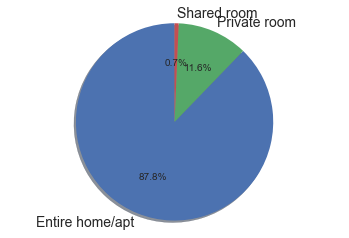

In [4]:
fig, ax = plt.subplots()
ax.pie(r_type_pie.values, labels=r_type_pie.index.values, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**bed_type**

In [5]:
b_type = data.bed_type.value_counts()
print(len(data.bed_type.unique()), 'unique bed types (mostly entire homes/appt 88%) types:', data.bed_type.unique())

5 unique bed types (mostly entire homes/appt 88%) types: ['Real Bed' 'Futon' 'Couch' 'Pull-out Sofa' 'Airbed']


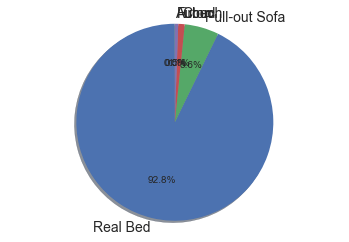

In [6]:
fig, ax = plt.subplots()
ax.pie(b_type.values, labels=b_type.index.values, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

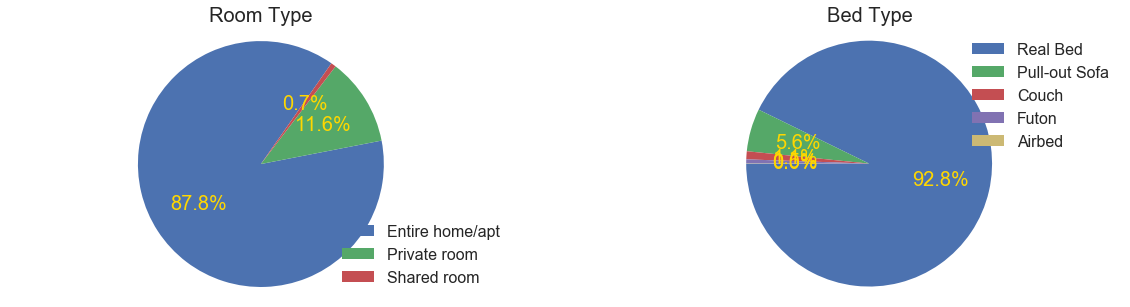

In [11]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,2,1)
ax1.pie(r_type_pie.values, autopct='%1.1f%%', startangle=55, textprops={'fontsize': 20, 'color': 'gold'})
ax1.axis('equal') 
ax1.set_title('Room Type')
ax1.legend(labels=r_type_pie.index.values,loc=4, prop={'size': 16})

ax2 = fig.add_subplot(1,2,2)
ax2.pie(b_type.values, autopct='%1.1f%%', startangle=180, textprops={'fontsize': 20, 'color': 'gold'})
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Bed Type')
ax2.legend(labels=b_type.index.values, loc=1,prop={'size': 16})

plt.show()
fig.savefig('../images/EDA_room_n_bed_types.png', bbox_inches='tight')

**accomodates**

Variable related to size of listing

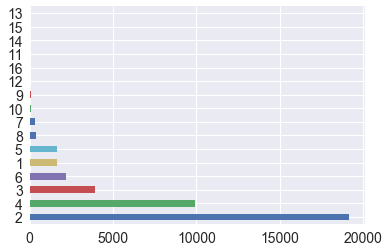

In [16]:
accmdts = data.accommodates
accmdts.value_counts().plot(kind='barh')

**bathrooms & beds**

If there are no bathrooms within the room or appartment, that can be inconvenient. 

The number of bathrooms range from 0 to 8 where 88% of the listings have 1 bathroom and 55% have 1 bed. On the other hand there are 33 listings that have no bathroom since they are not part of the common types of room. It turns out they are seminar rooms, showrooms, studios and "chambre de bonne" which are also studios located on the last floor and where the WC is outside somewhere along the corridor. 

There are 34 listings that dont list a bed at all. They must've forgot as they are all entire homes/apts with 0 real beds who can accommodate 2 to 7 guests and 1 to 4 extra people. So there is no such thing as a listing without beds, unless it's a seminary or showroom. Since I'm looking for factors that can affect the quality of the listing, the number of beds doesnt matter. 

On the other hand there are 7 Boutique hotel listings that report 50 bathrooms and 4 of them report 50 beds!    

In [29]:
data.loc[data.bathrooms==0, ['price']].sort_values('price', ascending=False).shape

(33, 1)

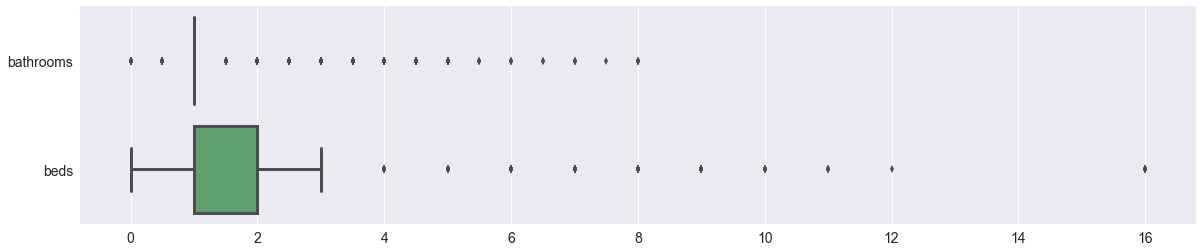

In [17]:
fig = plt.figure(figsize = (20,4))
sns.boxplot(data=data.loc[(data.bathrooms<50)&(data.beds<50),['bathrooms','beds']], orient="h")
plt.show()

**amenities**

There are 137 unique amenities and **some listings dont have amenities !!!**

AMENITIES
    
When it comes to amenities, listings will have the essential plus some extra that adds color and value to the listing. The **Best listings** have at least the essential **amenities** that's why Airbnb provides and option called "Essentials" and 94% listings checked it. There are 136 unique amenities and in average each listing has over 16 listed. 

In an attempt to discover these essential amenities, I got the top 16 amenities for those listings that reported having the essentials and compared it with the top 16 amenities for those listings that didnt check for the essentials. 

- *Which are the "Essential" amenities?*
    - Is there a difference in amenities between those listings that reported having essential amenities and those who didnt?
    - Analyze those categories that everyone has. I think those might be essential.
2. Divide the listings in those who have common ammenities and those who dont.
3. Map the listings with the number of amenities proportional to the scatter dot size. 

In [20]:
# Get the amenities per listing
my_amnty = data.loc[:,['amenities']].sample(frac=1)
my_amnty['amnty'] = my_amnty.amenities.apply(lambda x: x.replace('{','').replace('}','').replace('"','').split(','))

# Get those listings where they checked in "Essentials" and those who didnt
essentials = my_amnty.amnty.apply(lambda x: 'Essentials' in x)
not_essentials = my_amnty[~essentials].index

In [21]:
e_amenities_per_listing, e_amenity_df, e_amenity_cat = get_amenity_tools(my_amnty[essentials], my_amnty[essentials].shape[0])
ne_amenities_per_listing, ne_amenity_df, ne_amenity_cat = get_amenity_tools(my_amnty.loc[not_essentials], my_amnty.loc[not_essentials].shape[0])


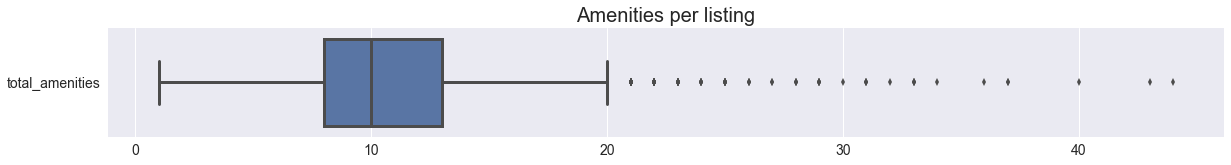

In [22]:
fig = plt.figure(figsize = (20,2))
sns.boxplot(data=ne_amenities_per_listing.loc[:,['total_amenities']], orient="h")
plt.title('Amenities per listing')
plt.show()

In [19]:
# Remove the Amenity "Essentials" from the list as it's being considered. 
listings_w_essentials_top_list = e_amenity_df.sort_values(['Proportion','Count'], ascending=False).head(17).loc[:,['Amnty','Proportion']]
listings_w_essentials_top_list = listings_w_essentials_top_list[listings_w_essentials_top_list.Amnty != 'Essentials'].reset_index()

listings_w_no_essentials_top_list = ne_amenity_df.sort_values(['Proportion','Count'], ascending=False).head(16).loc[:,['Amnty','Proportion']].reset_index()


KeyError: 'Proportion'

In [10]:
essential_vs_non_essential = pd.concat([listings_w_essentials_top_list.drop('index',axis=1), listings_w_no_essentials_top_list.drop('index',axis=1)], axis=1)
essential_vs_non_essential

,Amnty,Proportion_%,Amnty,Proportion_%
0,Heating,96,Kitchen,92
1,Wifi,96,Wifi,89
2,Kitchen,96,Heating,89
3,Washer,78,Washer,72
4,Hangers,72,TV,60
5,Smoke detector,70,Smoke detector,49
6,Hair dryer,70,Family/kid friendly,46
7,Iron,69,Internet,46
8,TV,65,Iron,41
9,Shampoo,64,Hair dryer,39


Seems like the listings reporting essential amenities have the pretty much the same amenities as those who didnt checked the "Essential" amenity. According to the above chart, it would seem that shampoo and hot water are more essential than buzzers and cable TV. This sounds obvious so I will remove the "Essentials" from the amenities list and keep the first list. 

**How many listings count with these essential amenities?**

In [11]:
amenity_per_listings, amenity_count, amenity_cat = get_amenity_tools(my_amnty, my_amnty.shape[0])
amenity_count.sort_values(['Proportion','Count'], ascending=False).head(17)

,Amnty,Count,Category,Proportion_%
4,Heating,37822,Electronics and Entertainment,96
3,Kitchen,37776,Food and Kitchen,95
2,Wifi,37755,Electronics and Entertainment,95
15,Essentials,36989,Other,93
11,Washer,30639,Electronics and Entertainment,77
17,Hangers,27587,Hygiene and bathroom,70
5,Smoke detector,27153,Safety and Security,68
18,Hair dryer,26829,Hygiene and bathroom,68
19,Iron,26528,Electronics and Entertainment,67
0,TV,25683,Electronics and Entertainment,65


In [12]:
amenity_cat.sort_values('nCount', ascending=False).head(16)

,Count,nCount,size_ctgry,nSize
Category,,,,
Electronics and Entertainment,231800,1.000000,17,0.123188
Food and Kitchen,102717,0.435957,17,0.123188
Hygiene and bathroom,100985,0.428389,25,0.181159
Other,94234,0.398889,11,0.079710
Safety and Security,74479,0.312567,16,0.115942
Accessibility,58080,0.240910,22,0.159420
Bedroom,16172,0.057788,10,0.072464
Furniture,7320,0.019108,5,0.036232
Pets,5345,0.010478,5,0.036232


The above chart shows nSize as a normalized value representing the size of each category. In other words, the percentage of the number amenities the category contains with respect to the total number of amenities listed. 

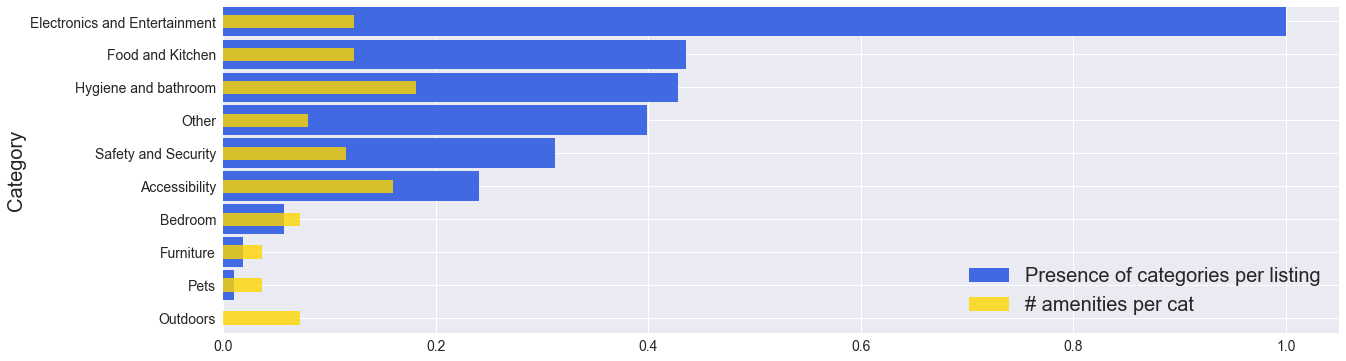

In [13]:
# Bar graph the categories and their (normalized) counts
fig = plt.figure(figsize=(20,6))
amenity_cat.nCount.plot(kind='barh', width=0.9 , color ='royalblue', label='Presence of categories per listing')
# Also include the number of how many items are there per category. 
amenity_cat.nSize.plot(kind='barh', width=0.4 ,color ='gold', alpha=0.8, label='# amenities per cat')
plt.legend(prop={'size': 20})
plt.show()

In [14]:
fig.savefig('../images/EDA_amenities_presence.png', bbox_inches='tight')

The figure above shows the normalized presence of each category (of amenities) in the dataset (in blue) and the size of each category (in yellow). It can be interpreted that many listings have more of electronic amenities or entertainment related than amenities related to safety and security or accessibility or even food and kitchen amenities. 

From the graph above one would intuitively say that as long as there are amenities refering to electronics and entertainment, the listing is showing promising. However common sense would say that a good listing must have at least one of each category, or at least an amount of amenities proportional to the presence of its respective category. 

In [15]:
# Classify in rare vs common amnits? 
rare_amnits = amenity_count.loc[amenity_count.Proportion<30]
common_amnits = amenity_count.loc[amenity_count.Proportion_>=30]

NameError: name 'prop_amnits' is not defined

**guests_included**

Most listings allow 1 guest extra, 2 max. 

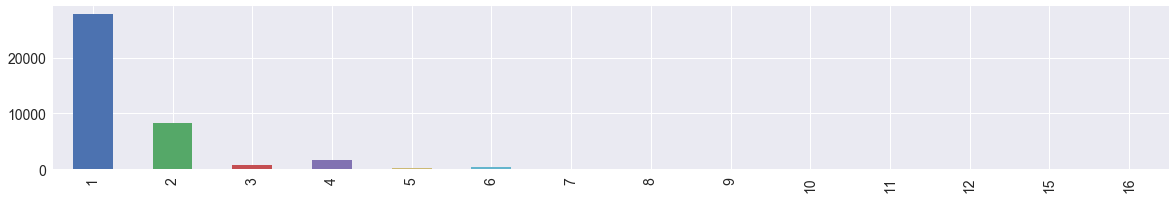

In [28]:
fig = plt.figure(figsize=(20, 3))
data.guests_included.value_counts().sort_index().plot(kind='bar')

**extra_people**

75% of the listings will charge from 0 to 10 euros for adding extra people. Must be related to price. 

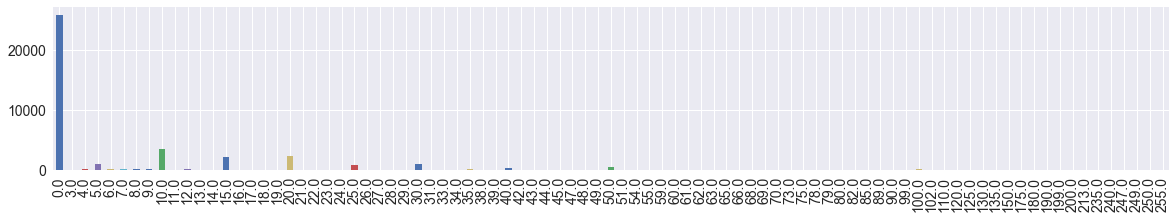

In [29]:
fig = plt.figure(figsize=(20, 3))
data.extra_people.value_counts().sort_index().plot(kind='bar')

**cancellation_policy**

It can be classified mainly in 3 categories: Flexible, Moderate and Strict with a 14 grace period. A few outliers have a very strict policy. 

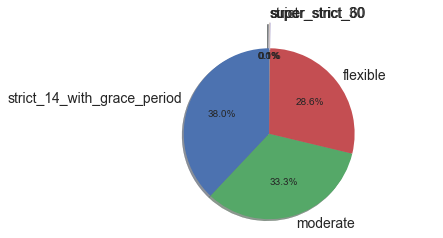

In [30]:
can_pol = data.cancellation_policy.value_counts()
fig, ax = plt.subplots()
ax.pie(can_pol.values, labels=can_pol.index.values, explode = [0,0,0,0.3,0.3,0.3], autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**price**

PRICE

The **best listing** should have a reasonable linear price/quality ratio. The less amenities a listing has (no real beds etc,) should yield a lower price and viceversa. Another intervening factor is the location. It is known that in most European cities the further you move away from the center the cheaper everything becomes. In Paris, this can be true except for certain districts like the 16th which is known to be quite expensive. In this project I will study this trinomial relationship. 

Are the expensive listings offering quality stays? What about the cheaper stays? Do they at least offer the essentials? Which is the district offering the highest/lowest rates (in average)?  

The price range resulted a bit sparse so I assigned it into broader intervals: 

In [3]:
breakpoints = [60, 120, 240,10000]
my_s = data.loc[:,['price','zipcode']]
my_s['price_cat'] = my_s.price.apply(get_interval)

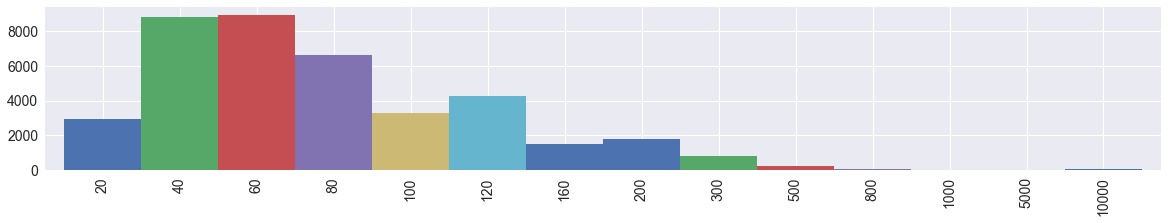

In [4]:
fig = plt.figure(figsize=(20, 3))
my_s.price_cat.value_counts().sort_index().plot(kind='bar', width=1.0)
plt.show()

In [20]:
fig.savefig('../images/EDA_price_range.png', bbox_inches='tight')

---

**zipcode and city**

In [2]:
unique_zipcodes = data.zipcode.unique()
print(len(unique_zipcodes), 'unique zipcodes and ')
unique_cities = data.city.unique()
print(len(unique_cities), ' unique cities (or districts)')

50 unique zipcodes and 
50  unique cities (or districts)


...where Paris has approximately 20 (the number of its districts a.k.a arrondissements) and the remaining zipcodes whose value is greater than 75020 correspond to the suburbs. In an attempt to verify the correctedness of the zipcodes I'm going to perform k-means (1 cluster) to get the centroid for each zipcode in the suburbs and having the centroid I can search for the city if it exists. That way I will fill in the city info and check for outliers. 

In [12]:
'''
#### How many listings per zipcode in the suburbs? 
zip_ban = zip_data.loc[banlieu].reset_index().groupby('zipcode').count().sort_values('latitude', ascending=False).drop(['city','longitude'], axis=1)
#### Get those suburbian zipcodes with 4 or more listings in it. 
zip_ban = zip_ban[zip_ban.latitude>3].reset_index()
zip_ban.rename(columns={'latitude':'#ofListings'}, inplace=True)
#### Get the centroid
zip_ban['centroid'] = zip_ban.zipcode.apply(get_centroid)
'''

"\n#### How many listings per zipcode in the suburbs? \nzip_ban = zip_data.loc[banlieu].reset_index().groupby('zipcode').count().sort_values('latitude', ascending=False).drop(['city','longitude'], axis=1)\n#### Get those suburbian zipcodes with 4 or more listings in it. \nzip_ban = zip_ban[zip_ban.latitude>3].reset_index()\nzip_ban.rename(columns={'latitude':'#ofListings'}, inplace=True)\n#### Get the centroid\nzip_ban['centroid'] = zip_ban.zipcode.apply(get_centroid)\n"

*Centroids appear to be within the limits of Paris.*

Scatter in the paris map all the listings with every arrnd of different color

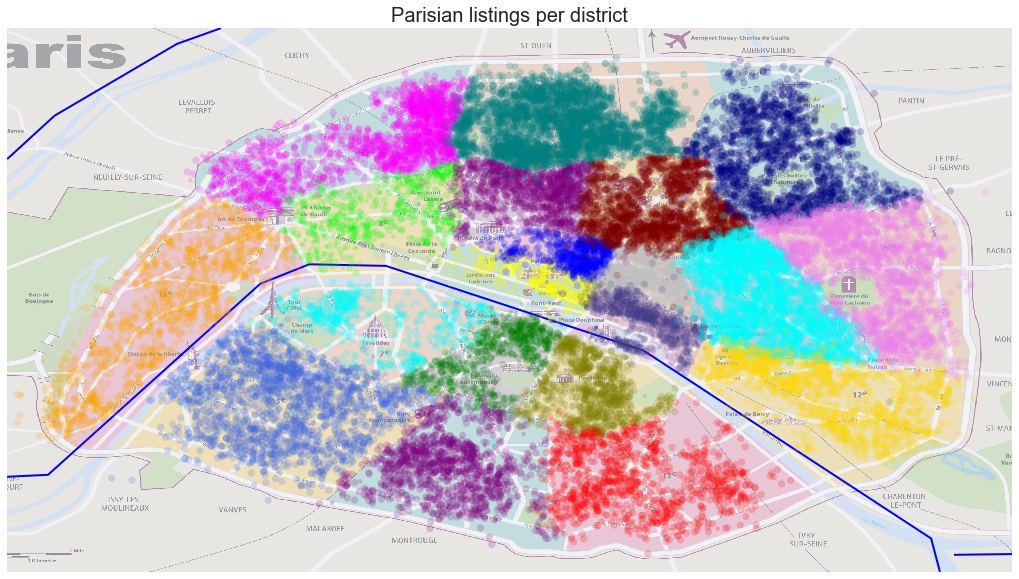

In [2]:
# coord, res = 'c', arrn_lim = 1, title_map='Paris', l_size=100, l_color = 'blue'
coord = data.loc[data.zipcode<76000,['latitude','longitude', 'zipcode', 'price']].reset_index()#.sample(frac=0.1)
print_map(coord, 'h', False, 'Parisian listings per district', False, False, 0.2)



- **require_guest_profile_picture & require_guest_phone_verification**

In [31]:
req_pic = data.require_guest_profile_picture.value_counts()
req_phone_ver = data.require_guest_phone_verification.value_counts()

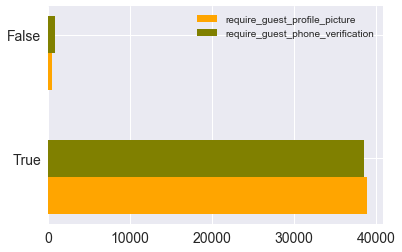

In [32]:
barWidth = 0.3
# The x position of bars
r1 = np.arange(2)
r2 = [x + barWidth for x in r1]

plt.barh(r1, req_pic.values,  height = barWidth, color = 'orange', label='require_guest_profile_picture')
plt.barh(r2, req_phone_ver.values, height = barWidth, color = 'olive', label='require_guest_phone_verification')

plt.yticks([r + barWidth for r in range(2)], ['True', 'False'])

# Create legend
plt.legend()
plt.show()

MINIMUM AND MAXIMUM NIGHTS

These are pieces of data that will help defining the occupancy rate. There appears to be 11 outliers in the minimum_nights with a values greater than 500. On the maximum nights side there are 22618 listings with values higher than 365. 

Cutting off the outliers the distribution of the minimum number of nights is of the form: 

                  count      mean        std  min  25%  50%  75%    max
minimum_nights  39349.0  4.470253  15.411834  1.0  2.0  2.0  4.0  365.0


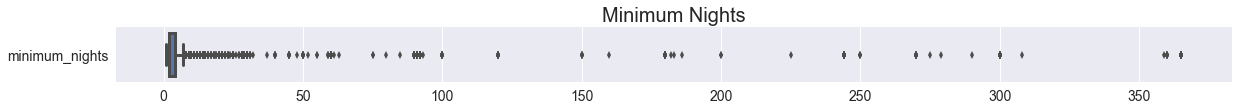

In [40]:
print(data.loc[data.minimum_nights<=365,['minimum_nights']].describe().T)
fig = plt.figure(figsize = (20,1))
sns.boxplot(data=data.loc[data.minimum_nights<=365,['minimum_nights']], orient="h")
plt.title('Minimum Nights')
plt.show()

In [41]:
fig.savefig('../images/EDA_minimum_nights_range.png', bbox_inches='tight')

- **number_of_reviews & reviews_per_month**

Listings have 22 reviews in average, this is considering old and new listings. A definite outlier has a bit less than 700 reviews!

Let's see which listings have been in the market for less than 5 months



Listing 11034796 is the only one having more than 50 reviews per month (224 to be exact) so without considering it the average reviews per month is 1. 

In [34]:
# Get the accurate number of reviews per listing
review_count = reviews_data.loc[:,['listing_id','date']].groupby('listing_id').count()
review_count.rename(columns={'date':'num_reviews'}, inplace=True)
data = pd.merge(data, review_count, right_index=True, left_index=True)
data['num_rv_verify'] = data.number_of_reviews==data.num_reviews
data.loc[data.num_rv_verify==False,['number_of_reviews','num_reviews']].shape

(290, 2)

There are 290 listings that differ from the number of reviews values already in the dataset and the actual number of reviews from the reviews file. I will keep the latter. 

In [35]:
data.drop(['number_of_reviews','num_rv_verify'], axis=1, inplace=True)
data.rename(columns={'num_reviews':'number_of_reviews'}, inplace=True)

In [36]:
# Verify the accuracy of the reviews_per_month
rpm = get_reviews_per_month()
# Compare if the reviews per month are equal
data = pd.merge(data, rpm, right_index=True, left_index=True)
data['check_rpm'] = data.reviews_per_month==data.review_per_month
data.loc[data.check_rpm==False,].shape

(38205, 41)

38205 listings have a different (incorrect) value of reviews per month or at least it is not the average of the reviews taken per month. Therefore I will consider the calculation I performed over the values that were provided. 

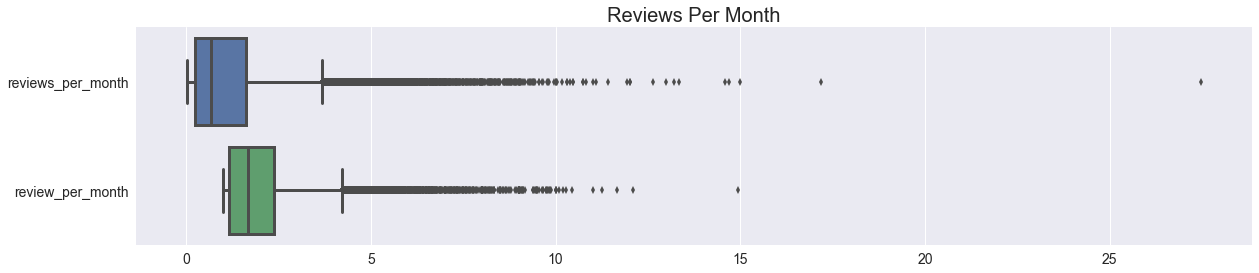

In [36]:
fig = plt.figure(figsize = (20,4))
sns.boxplot(data=data.loc[data.reviews_per_month<200,['reviews_per_month','review_per_month']], orient="h")
plt.title('Reviews Per Month')
plt.show()

In [37]:
data.drop(['check_rpm','reviews_per_month'], axis=1, inplace=True)
data.rename(columns={'review_per_month':'reviews_per_month'}, inplace=True)

In [39]:
data.loc[data.reviews_per_month<200,'reviews_per_month'].describe()

count    39359.000000
mean         1.200745
std          1.423641
min          0.010000
25%          0.250000
50%          0.680000
75%          1.620000
max         27.470000
Name: reviews_per_month, dtype: float64

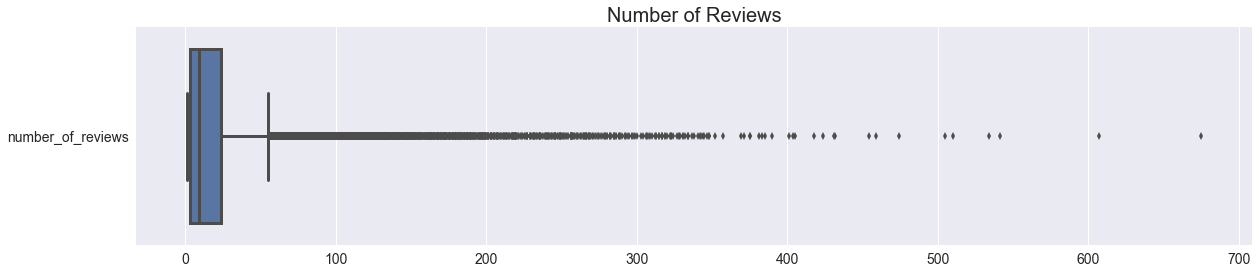

In [37]:
fig = plt.figure(figsize = (20,4))
sns.boxplot(data=data.loc[:,['number_of_reviews']], orient="h")
plt.title('Number of Reviews')
plt.show()

- **first_review & last_review**


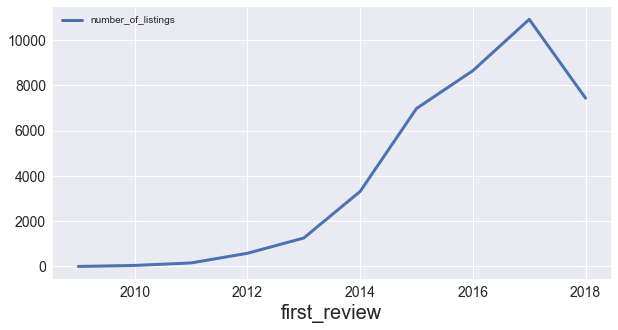

In [15]:
# Showing the number of listings joined per year. 
f_rev = data.loc[:,['first_review', 'number_of_reviews']].set_index('first_review').resample('Y').count()
f_rev.rename(columns={'number_of_reviews': 'number_of_listings'}, inplace=True)
f_rev.plot() 
plt.show()

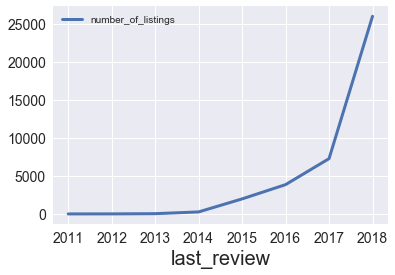

In [101]:
l_rev = data.loc[:,['last_review', 'number_of_reviews']].set_index('last_review').resample('Y', how='count')
l_rev.rename(columns={'number_of_reviews': 'number_of_listings'}, inplace=True)
l_rev.plot() 
plt.show()

REVIEW_SCORES..

Set of variables with scores for 6 different aspects of the listing: 
    1. Rating: Variable with unknown origin, ranging from a score of 20 to 100 with a mean of 93
    2. Accuracy: Refers to the accuracy of the description
    3. Cleanliness: Speaks for itself. 
    4. Checkin: Marks how smooth the host experienced its arrival and departure of the listing. 
    5. Communication: Refers to the reactivity of the host in accurately fulfilling its host's requests. Should be correlated with host_response_time
    6. Location: Refers to the quality of the neighbourhood. 
    7. Value: Could be interpreted as the fairness in the price/listing ratio. 

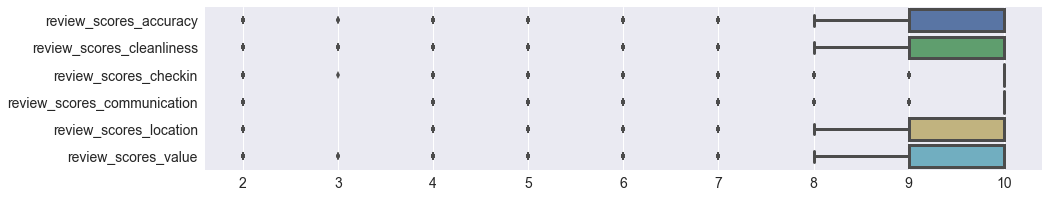

In [23]:
r_col = ['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
fig = plt.figure(figsize=(15, 3))
sns.boxplot(data=data.loc[:,r_col], orient='h')
plt.show() 

In [24]:
fig.savefig('../images/EDA_review_scores.png', bbox_inches='tight')